In [1]:
%load_ext autoreload
%autoreload 2

# Commands

In [2]:
# ! pip install git+git://github.com/target/matrixprofile-ts#installation

In [3]:
# %%time
# %%capture
# ! pip install git+https://github.com/rob-med/owlpy

# Import

In [4]:
import matplotlib.pyplot as plt # grafikams
import numpy as np # skaičiavimams
import time

%%time
%%capture

# Grafikams
import mir_eval.display 
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

# Notebook audio player
import IPython.display


# Analizės įrankiai
from scipy import signal
from scipy.io import wavfile


UsageError: Line magic function `%%time` not found.


In [6]:
from core import *

In [7]:
%%capture
from main import *

# Read A, B

In [8]:
sample_rateA, samplesA = wavfile.read('audio/Debussy_Wagner - The Flying Dutchman Overture (for 2 pianos).wav')
sample_rateB, samplesB = wavfile.read('audio/Wagner - Flying Dutchman - Overture-HqezCR_XzaI.wav')

# sample_rate ---- sampling frequancy, muzikos formato dažnis, (kiek skaičių per sekundę reprezentuoja garsą)
# data --- garso takelis, [stereo :> du takeliai]

In [9]:
sample_rateA, sample_rateB
sample_rate = sample_rateA

In [10]:
sample_rate

48000

In [11]:
# pasiklausome pirmas 10s įrašo
# IPython.display.Audio(samplesA[: sample_rateA*10, 0], rate=sample_rateA) # play 10% of the track

# Mel spektrograma

In [12]:
stft_hop = int(sample_rate * 23 / 1000) # 23 ms

In [13]:
mel_A = get_mel_spectrogram(samplesA)
mel_B = get_mel_spectrogram(samplesB)

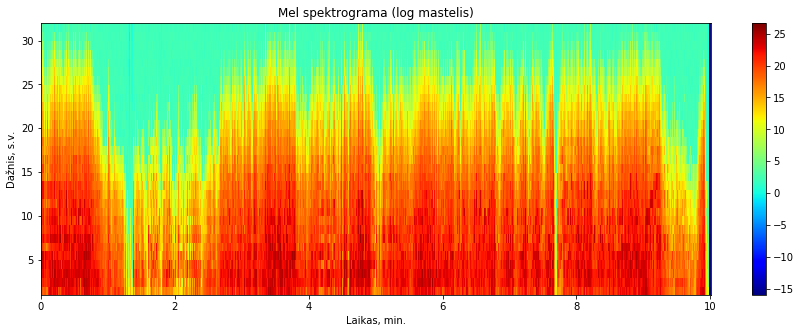

In [14]:
plot_mel_spectrogram(mel_A)

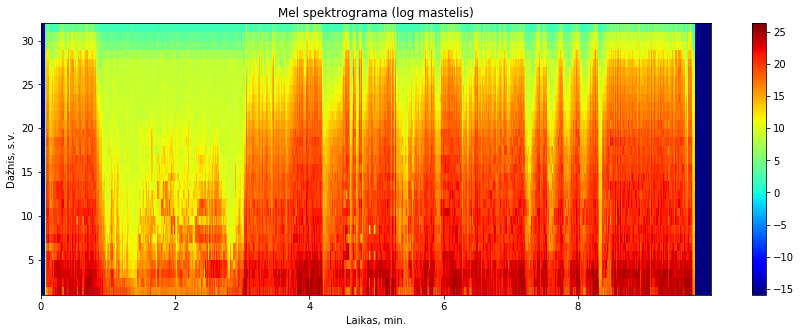

In [15]:
plot_mel_spectrogram(mel_B)

# Motyvų paieška

Naudojame laiko eilutės motyvų paieškos algoritmą:

1. Chin-Chia Michael Yeh, Yan Zhu, Liudmila Ulanova, Nurjahan Begum, Yifei Ding, Hoang Anh Dau, Diego Furtado Silva, Abdullah Mueen, Eamonn Keogh (2016). Matrix Profile I: All Pairs Similarity Joins for Time Series: A Unifying View that Includes Motifs, Discords and Shapelets. IEEE ICDM 2016

2. Matrix Profile II: Exploiting a Novel Algorithm and GPUs to break the one Hundred Million Barrier for Time Series Motifs and Joins. Yan Zhu, Zachary Zimmerman, Nader Shakibay Senobari, Chin-Chia Michael Yeh, Gareth Funning, Abdullah Mueen, Philip Berisk and Eamonn Keogh (2016). EEE ICDM 2016

3. Matrix Profile V: A Generic Technique to Incorporate Domain Knowledge into Motif Discovery. Hoang Anh Dau and Eamonn Keogh. KDD'17, Halifax, Canada.

Naudojame šio algoritmo įgyvendinimą atviro kodo python pakete: https://github.com/target/matrixprofile-ts

In [16]:
stft_hop / sample_rate # one step trukme [s]

0.023

In [17]:
sub_len = 218 # 5s trukmė mel spektrogramos žingsniais

## Apskaičiuojame Mel spektrogramos "matrix profile": motyvų paieška

In [18]:
seconds_to_steps(20)

872

In [19]:
m = 218*4 # 20s

In [20]:
m

872

In [21]:
mel_A.shape

(32, 26096)

In [25]:
A = mel_A[10,2000:3000]
B = mel_B[10,2000:3000]

In [73]:
motif_len = 20
matrix_profile, mpIndex = get_m_profile(A, A, motif_len)

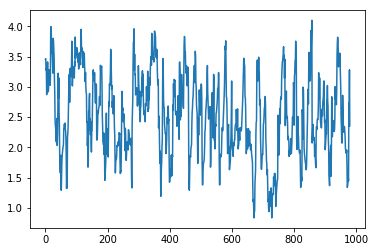

In [74]:
plt.plot(matrix_profile)

In [75]:
# plt.plot(mpIndex)

# Filtering

In [76]:
idx_1, idx_2, distanceL2 = top_motifs(matrix_profile, mpIndex, N=500, min_distance=0)

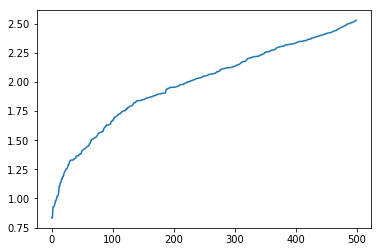

In [77]:
plt.plot(distanceL2)

In [80]:
idx_1[0], idx_2[0]

(671, 729)

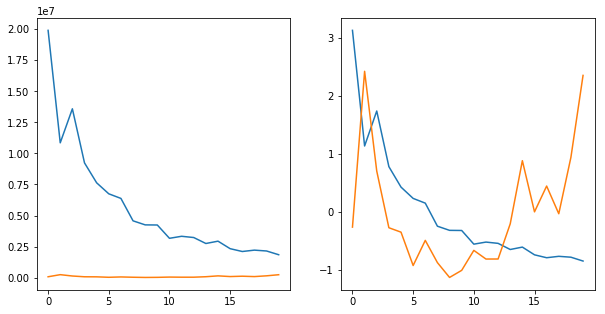

In [81]:
inspect_motifs(A, B, idx_1[1], idx_2[1], motif_len)

# Atrinkti motyvai

In [83]:
play_motifs(idx_1, idx_2, motif_len, samplesA, samplesB)

# Motyvų lentelė

# Sin test

In [100]:
x = np.linspace(0, 100, 500)
y = np.sin(x)

In [101]:
m_profile, m_idx = get_m_profile(y,y,100)

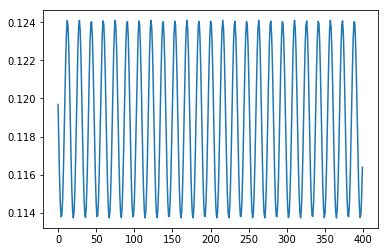

In [102]:
plt.plot(m_profile)

In [108]:
idx_1, idx_2, distanceL2 = top_motifs(m_profile, m_idx, N=40, min_distance=0)

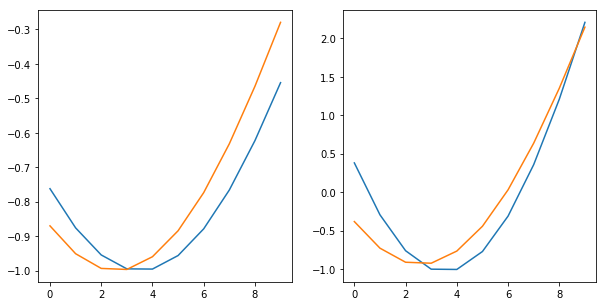

In [111]:
inspect_motifs(y,y,idx_1[0], idx_2[0], 10)